# Import Declarations

In [ ]:
import numpy as np
import random as rand

# Constants

In [ ]:
# First set of constants are for states of a block
EMPTY = 0
GOAL = 1
BLOCKED = 2

# Second set of constants are for actions that a state can take
# for easier interfacing into the state probability matrix
UP = 0
DOWN = 1
LEFT = 2
RIGHT = 3
STAY = 4

In [ ]:
# Gridworld declarations. Images will be attached of what these
# gridworlds look like. Rows here are the columns/y values in the gridworlds
# The only one that doesn't have an image is gw4, which is the blank gridworld.
gw1 = [[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0],
       [0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0],
       [0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0],
       [0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0],
       [2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0],
       [0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0],
       [0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0],
       [0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0],
       [0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2],
       [0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0],
       [0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0],
       [0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2],
       [0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2],
       [0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2],
       [0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0],
       [0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0],
       [0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0],
       [0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0],
       [0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0],
       [0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0],
       [0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

gw2 = [[1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2],
       [0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2],
       [0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2],
       [0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2],
       [0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0],
       [0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
       [0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0],
       [0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0],
       [0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0],
       [0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0],
       [0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0],
       [0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 0],
       [0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0],
       [0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0],
       [0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0],
       [0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0],
       [0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0],
       [0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0],
       [0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0],
       [0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0],
       [0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0],
       [0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0],
       [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0]]

gw3 = [[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2],
       [0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0],
       [0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0],
       [0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2],
       [0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0],
       [0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0],
       [0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0],
       [2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0],
       [0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0],
       [0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

gw4 = np.zeros((25, 25))
gw4[0][0] = 1

GW1:

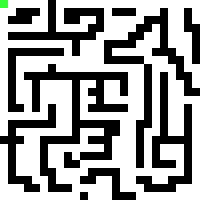

GW2:

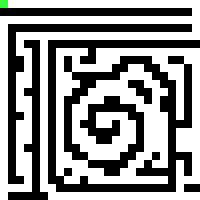

GW3:

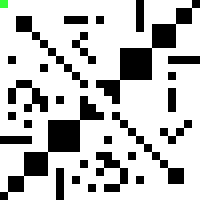

# Classes


In [ ]:
class MDP:
  # Initialization function

  # Grid World needs to be a 25x25 matrix containing states.
  # States will be defined by EMPTY, BLOCKED, or GOAL
  def __init__(self, gridworld):
    self.stateSpace = self.initStateSpace(gridworld)
    self.actionSpace = self.initActionSpace(gridworld, self.stateSpace)
    self.probMatrix = self.initProbMatrix(gridworld, self.actionSpace)

    # High discount factor was needed specifically for gw2. The inside of
    # the spiral was leading to unoptimal actions.
    self.discountFactor = 0.95

  # Functions
  def reward(self, state, action):
    # Since (0, 0) or State 0 is our goal,
    # we would never want to move out of there. Computation should also stop
    # if we reach the goal state. Thus, we shouldn't charge the agent for
    # staying in 0.
    if state == 0:
      return 0

    return -1

  # Provides the state space, which will be a list of all possible states
  # the MDP can be in
  # Note: we know the grid world is 25x25 so we can hardcode that into
  # the function for easier use.
  def initStateSpace(self, gridworld):
    stateSpace = []
    for y in range(0, 25):
      for x in range (0, 25):
        state = gridworld[x][y]

        # Don't do != BLOCKED so we don't catch any wrong states (such as
        # it being a number above 2)
        if (state == EMPTY or state == GOAL):
          stateSpace.append(x + 25 * y)

    return stateSpace

  # Returns the possible actions that you can take in each state
  def initActionSpace(self, gridworld, stateSpace):
    actionSpace = []

    for i in range(25*25):
      actionSpace.append([])

    for state in stateSpace:

      # Test if we can move to the state above us.
      if state >= 25:
        if (state - 25) in stateSpace:
          actionSpace[state].append(UP)

      # Test if we can move to the state below us.
      if state <= (25 * 24 - 1):
        if (state + 25) in stateSpace:
          actionSpace[state].append(DOWN)

      # Test if we can move to the state to the left of us.
      if state % 25 != 0:
        if (state - 1) in stateSpace:
          actionSpace[state].append(LEFT)

      # Test if we can move to the state to the right of us.
      if state % 25 != 24:
        if (state + 1) in stateSpace:
          actionSpace[state].append(RIGHT)

      # We can always stay in the current state.
      actionSpace[state].append(STAY)

    actionSpace[0] = [STAY]

    return actionSpace

  # The probability matrix will have the dimensions SxSxA
  # where S is the number of states and A is the number of possible actions.
  # While the state probability matrix for a Markov Process has
  # the sum of rows being 1, as far as I can tell, we cannot have this in
  # our grid world. There are some states that will just not be able to take
  # an action (such as moving out). The policy will take these into account.
  def initProbMatrix(self, gridworld, actionSpace):
    # 625 states, 5 actions possible.
    probMatrix = np.zeros((625, 625, 5))

    for state in range(len(actionSpace)):
      for action in actionSpace[state]:

        # I do not use the global declarations here due to Python's
        # quirks when it comes to match cases. It sees the global
        # declarations as irrefutable patterns to match to. Python
        # allows this in ONLY one case: the last one.
        match action:
          case 4: # STAY
            probMatrix[state][state][STAY] = 1.0
          case 0: # UP
            probMatrix[state][state - 25][UP] = 1.0
          case 1: # DOWN
            probMatrix[state][state + 25][DOWN] = 1.0
          case 2: # LEFT
            probMatrix[state][state - 1][LEFT] = 1.0
          case 3: # RIGHT
            probMatrix[state][state + 1][RIGHT] = 1.0

    return probMatrix

# Main Function

In [ ]:
def main():
  # We choose one of our gridworlds defined above. I was unsure
  # if we were supposed to receive one so I made my own. There are
  # 4 of them for throrough testing.
  gridworld = np.array(gw1)

  # Create a new MDP using the gridworld we selected above. (1)
  newMDP = MDP(gridworld)

  storePolicies = []

  # Make a new random policy (2a)
  randomPolicy = defineRandomPolicy(newMDP)
  valueFunc = defineRandomValueFunc(newMDP)

  # We store the policies we have collected for later use in performance checking.
  # We use dict() to make a copy of randomPolicy. If we didn't do this, Python
  # would store a reference to the randomPolicy dict, causing any change to affect
  # every reference in storePolicies.
  storePolicies.append(dict(randomPolicy))

  convergence = False

  # Repeat until convergence (2d)
  while (not convergence):
    oldValue = np.copy(valueFunc)

    # Evaluate our policy (2b)
    valueFunc = policyEvaluation(newMDP, randomPolicy, valueFunc)

    # Improve our policy (2c)
    randomPolicy = policyImprovement(MDP, randomPolicy, valueFunc)

    # Our value function includes blocked states. They default to 0
    # so we take the max to make sure that the values that are changing
    # are checked.
    if np.max(np.abs(valueFunc - oldValue)) < 0.000001:
      convergence = True

    storePolicies.append(dict(randomPolicy))

  # Print out the PI policy
  print("Policy Iteration Policy: ")
  visualizePolicy(randomPolicy)
  print()

  # Find the policy from value iteration
  valueFunc = defineRandomValueFunc(newMDP)
  policy = valueIteration(newMDP, valueFunc)

  # Print out the VI policy
  print("Value Interation Policy: ")
  visualizePolicy(policy)
  print()

  # Additional check to make sure that the two policies are the same
  # (they should be)
  print("PI Policy == VI Policy?:", (randomPolicy == policy))
  print()

  # Print out the optimal value function
  print("Optimal Value Function:")
  visualizeValueFunction(valueFunc)
  print()

  # We select 3 policies: start, middle, and end.
  # Set storePolicies to None to free space.
  policies = [storePolicies[0], storePolicies[len(storePolicies) // 2], randomPolicy]
  storePolicies = None

  # Print out the performance of the policies that we collected.
  print("Policy Performance:")
  checkPolicyPerformance(newMDP, policies)


  return

# Additional Functions

In [ ]:
# At the beginning, we will choose a random action to go down for each state we can be in.
# This can be defined using a stochastic policy where each action is equally as
# possible of happening.
#
# States that we cannot move into are not in the policy.
def defineRandomPolicy(MDP):
  policy = {}

  actionSpace = MDP.actionSpace
  stateSpace = MDP.stateSpace

  # For each state, we set the chance to take any action
  # as the same probability for each action.
  for state in stateSpace:
    numActions = len(actionSpace[state])

    actionMap = {}

    for action in actionSpace[state]:
      actionMap[action] = 1/numActions

    policy[state] = actionMap

  return policy

In [ ]:
# At the beginning, we will choose to set our value function for all states to 0.
# Easy!
def defineRandomValueFunc(MDP):
  # Use a numpy array for quick calculations of convergence. The trade-off
  # between access of an np array and dict shouldn't be too bad, but the convergence
  # calc will be immensely increased.
  valueFunc = np.zeros(625)

  return valueFunc

In [ ]:
# For each state, we need to run the equation:
# For all actions: pi(a | s)(R(a, s) + y(Sum of s' in S(P(a, ss') * v(s'))))
# This is broken apart in the function.
def policyEvaluation(mdp, policy, valueFunc):

  # The value function is supposed to be updated all at once, but this is
  # an update that happens one at a time. We need to make sure we're not
  # using updated values before we're done updating all of the states.
  #
  # Yes, the main function also has a copy but I want to keep them separate.
  valueFuncBeforeUpdate = np.copy(valueFunc)

  # Update for each state in the policy
  for state in policy:
    newValue = 0

    # Value function cares about each action the policy can take.
    for action in policy[state]:

      # Find the next state. We know that there is only
      # one state that we will go to given we take an action.
      # This also cuts out the summation over s' in the value update.
      sPrime = nextState(state, action)

      # pi(a | s) * (R + yV(s'))
      newValue += policy[state][action] * (mdp.reward(state, action) + mdp.discountFactor * valueFuncBeforeUpdate[sPrime])

    valueFunc[state] = newValue

  return valueFunc

In [ ]:
# To improve our policy, we need to greedily choose actions
# depending on our value function. This will be by taking the actions
# that maximize our value function (aka the least negative).
def policyImprovement(mdp, policy, valueFunc):

  for state in policy:
    newActionSpace = {}

    maxValue = 0
    for action in policy[state]:

      sPrime = nextState(state, action)
      newValue = valueFunc[sPrime]

      # If we have a new state we're analyzing, then the first action will
      # be the highest one. Default to this being added.
      if len(newActionSpace) == 0:
        newActionSpace[action] = 0
        maxValue = newValue

        # I usually don't like doing continues but I don't want
        # to waste time with additional checks
        continue

      # We check if the current action will lead to a higher
      # value function. If it does, we want to create a new action space
      # since the greedy policy will only let us choose the max actions.
      if (newValue - maxValue) > 0.000001:
        newActionSpace = {}
        newActionSpace[action] = 0
        maxValue = newValue

      # If it isn't higher than, is it at least equal to? Greedily
      # choosing includes any option that is the max.
      elif (newValue - maxValue) > -0.000001 and (newValue - maxValue) < 0.000001:
        newActionSpace[action] = 0

    numActions = len(newActionSpace)

    for action in newActionSpace:
      newActionSpace[action] = 1/numActions

    policy[state] = newActionSpace

  return policy

In [ ]:
# For each state, we need to choose the action that maximizes the
# state-value function. We'll repeatedly evaluate the state-value function
# until it converges. Once it converges, we need to form a policy from it.
def valueIteration(mdp, valueFunc):

  actionSpace = mdp.actionSpace
  stateSpace = mdp.stateSpace

  convergence = False
  loops = 0

  while (not convergence):
    # Need a shallow copy of the array as we don't want to be using new values
    # in our calculations.
    oldValues = np.copy(valueFunc)

    # Update each state in value function. Little shortcut by only updating
    # the states we'll go to.
    for state in stateSpace:

      # Placeholder value
      maxValue = None

      # The action space spans all 625 states. If there are no actions for a state,
      # this loop will simply not execute.
      for action in actionSpace[state]:
        sPrime = nextState(state, action)

        # R(s, a) + yV(s')
        calculatedValue = mdp.reward(state, action) + mdp.discountFactor * oldValues[sPrime]

        # We know that the calc value is the max if there is no value
        # Otherwise, we need to compare the two
        if maxValue == None:
          maxValue = calculatedValue
        elif (calculatedValue - maxValue) > -0.000001:
          maxValue = calculatedValue

      valueFunc[state] = maxValue

    if np.max(np.abs(valueFunc - oldValues)) < 0.000001:
      convergence = True

    policy = findOptimalPolicy(mdp, valueFunc)
  return policy

In [ ]:
# Given an mdp and value function, it will find the policy that maximizes the
# state-value function. This procedure will be similar to the random policy
# function.
def findOptimalPolicy(mdp, valueFunc):
  policy = {}

  actionSpace = mdp.actionSpace
  stateSpace = mdp.stateSpace

  # For every state, we need to find the action
  # that maximizes the state value function.
  for state in stateSpace:

    maxValue = None
    newActionSpace = {}

    # To find the action that maximizes it, we check the possible value functions
    # for each s' where s' is some state reachable from s.
    for action in actionSpace[state]:
      sPrime = nextState(state, action)

      sPrimeValue = valueFunc[sPrime]

      # If there has been no max value, the first action
      # we check will have the current max value.
      if maxValue == None:
        maxValue = sPrimeValue
        newActionSpace[action] = 0
      # Check to see if the value we are checking is the new max.
      # Since these are negatives, a higher max value will lead
      # to this subtraction being positive.
      # If we have a new max, we need to erase the old action space.
      elif (sPrimeValue - maxValue) > 0.000001:
        maxValue = sPrimeValue
        newActionSpace = {}
        newActionSpace[action] = 0
      # Equal to? Want to include all actions that maximize the state-value function
      elif (sPrimeValue - maxValue) > -0.000001 and (sPrimeValue - maxValue) < 0.000001:
        newActionSpace[action] = 0

    numActions = len(newActionSpace)

    for action in newActionSpace:
      newActionSpace[action] = 1/numActions

    policy[state] = newActionSpace

  return policy

In [ ]:
# This isn't a complex function. Didn't need policy
# evaluation and value iteration to be crowded with irrelevant code.
def nextState(state, action):

  match action:
    case 4: # STAY
      newState = state
    case 0: # UP
      newState = state - 25
    case 1: # DOWN
      newState = state + 25
    case 2: # LEFT
      newState = state - 1
    case 3: # RIGHT
      newState = state + 1

  return newState

In [ ]:
# Mess of a function. Visualizes the policy by making a gridworld where each
# block contains the possible moves from that block.
def visualizePolicy(policy):

  # Prints the top wall.
  for x in range(25):
    print(" -----", end='')

  print()

  for state in range(625):
    print("|", end='')

    # For each state in the policy, we want to check the possible moves
    # that we can take out of that state. If we can take a move, print out
    # the appropriate symbol, otherwise, put a space.
    if state in policy:
      curState = policy[state]

      if UP in curState:
        print("↑", end='')
      else:
        print(" ", end='')

      if DOWN in curState:
        print("↓", end='')
      else:
        print(" ", end='')

      if LEFT in curState:
        print("←", end='')
      else:
        print(" ", end='')

      if RIGHT in curState:
        print("→", end='')
      else:
        print(" ", end='')

      if STAY in curState:
        print("S",end='')
      else:
        print(" ", end='')

    else:
      # Not being in the policy means that we're a blocked block. No moves!
      print("     ", end='')

    # If we've reached the end of a row, we have to move down
    # a row and print the lower wall.
    if state % 25 == 24:
      print("|")

      for x in range(25):
        print(" -----", end='')

      print()

  return

In [ ]:
# Another mess. Printing out formatted output is rough. Visualizes the value function
# by making a gridworld where each block contains the value function of that block.
# Note: Any BLOCKED block will have a value of 0.
def visualizeValueFunction(valueFunc):

  for x in range(25):
    print(" ------", end='')

  print()

  for state in range(625):
    print("|", end='')

    # Result is truncated to fit formatting better.
    print(f'{valueFunc[state]: 6.2f}', end='')

    if state % 25 == 24:
      print("|")

      for x in range(25):
        print(" ------", end='')

      print()

  return

# Performance Checking Functions

In [ ]:
# This is the performance checking as described in 4) for the assignment description.
# It will take a list of policies, select three random states, then run 3 trials on each state.
# It will output the average performance of the policy on that state.
def checkPolicyPerformance(mdp, policies):

  stateSpace = mdp.stateSpace
  actionSpace = mdp.actionSpace

  # 3 random states
  for x in range(3):
    randomStart = stateSpace[rand.randint(0, len(stateSpace) - 1)]

    print(f"Average of starting at state {randomStart}:")

    # For each policy we do:
    for y in range(len(policies)):

      print("\tPolicy", y, end=': ')

      policy = policies[y]
      actionList = []

      # 3 random trials
      for z in range(3):

        numOfActions = 0
        curState = randomStart

        # Loop while we are not at the goal start and we have not
        # hit the arbitrary number of max actions. We set it high
        # to give the policy a chance of finding the goal, but an
        # entirely random policy has the chance of never finding it.
        while (curState != 0 and numOfActions < 150000):
          # Each action has the same chance of happening. These are pseudo-random numbers
          # but are uniformly distributed.
          randAction = rand.choice(list(policy[curState].keys()))

          curState = nextState(curState, randAction)
          numOfActions += 1

        actionList.append(numOfActions)

      # Take the median of the actions taken
      actionList = sorted(actionList)
      print(actionList[1])

  return

# Main Call

In [ ]:
main()

Policy Iteration Policy: 
 ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- -----
|    S|  ←  |  ←  |  ←  |  ←  |  ←  |     |   → |   → |   → |   → |   → |   → | ↓   |  ←  |  ←  |  ←  | ↓←  | ↓←  | ↓←  |  ←  |  ←  |  ←  |  ←  |  ←  |
 ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- -----
|↑    |↑ ←  |     |     |     |↑    |     |↑    |     |     |     |     |     | ↓   |     |     |     | ↓   |  ←  |  ←  |     |↑    |↑ ←  |     |↑    |
 ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- -----
|↑    |     |     |     | ↓ → |↑    |     |↑    |     |     | ↓   |  ←  |     | ↓   | ↓←  | ↓←  | ↓←  |  ←  |     |     |     |↑    |↑ ←  |     |↑    |
 ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----

# Report

1) Choice of MDP Implementation

* I decided to implement MDPs as a class with its own attributes and functions for initialization. The attributes are everything that the 5-tuple of MDP includes. The reasons for making this a class instead of another data structure is:

>* 1) I wanted to keep all of the implementation of the MDP separate of the main function and policy. The policy does not need to know anything about the MDP to be able to improve itself. A class allows for this as we can keep all variables and functions related to the MDP inside of the MDP class.

>* 2) We should be able to make an MDP for any valid gridworld. We should take a gridworld and formulate everything we need from the gridworld without anything else. My MDP class allows for this due to the initialization functions inside of it making the state space, action space, probability matrix, and having declarations for the reward and discount factor.

>* 3) The access of the different elements of the MDP 5-tuple should be quick. Dot notation for classes allows for this.

>* 4) The functions for policy iteration/value iteration should not be crowded with multiple parameters all correlating to different parts of the MDP. Storing relevant information inside of this class lets us get rid of the need to pass the 5-tuple of an MDP to the function.

2) Performance of Policies

* Below are the median amount of actions it took for the policies to traverse gridworld 1 as shown at the top of the colab notebook. The states given are numbered where (x, y) in the grid world corresponds to state (x + y * 25).

Average of starting at state 179:

  * Random Policy: 757
  * Intermediate Policy: 19
  * Optimal Policy: 19

Average of starting at state 590:

  * Random Policy: 30529
  * Intermediate Policy: 500
  * Optimal Policy: 40

Average of starting at state 358:
  * Random Policy: 1000
  * Intermediate Policy: 26
  * Optimal Policy: 26

--------------------------------------------------

* The code for evaluating the performance of policies has a limited number of moves that the agent can take while following the policy. This is because, theoretically, the random policy has a chance of never finding the goal. It even reached 730,000 moves before finding the goal on gridworld 2. The max number of moves it can take, 150,000, is still high enough to give most executions a chance to find the goal state.
* There are many cases where the intermediate and optimal policy have the same number of moves. This is because the intermediate policy was taken from the middle of all the policies that were developed. States closer to the goal would have already been solved for the optimal action, so a start state that is close to the goal will have the same number of moves. Where the actions start to deviate is when we get far away from the goal, like in start state 590. I would highly recommend running the program with gridworld 2!
* When running the program, you will get different values for the same gridworld due to Python's random class. They are also referred to as Policy 0, 1, and 2. This correlates to Random, Intermediate, and Optimal, respectively.



